## Before you start :
   - These exercises are related to the Exploratory data analysis using matplotlib and seaborn.
   - The datasets for Challenge 2 and 3 are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

# Challenge 1

Answer all questions by drawing a graph. Then explain.

In [34]:
#import
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**0. Load seaborn dataset "tips"**

In [35]:
restaurante = sns.load_dataset("tips")
restaurante

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


**1. What is the prefered day for eating?**

<AxesSubplot:xlabel='day', ylabel='count'>

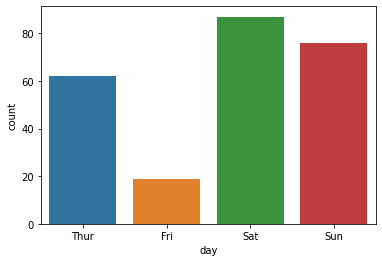

In [36]:
sns.countplot(x="day", data=restaurante)
#Mejor día el viernes porque es cuando menos gente hay

**2. What days of the week has more men than women payers?**

<AxesSubplot:xlabel='day', ylabel='count'>

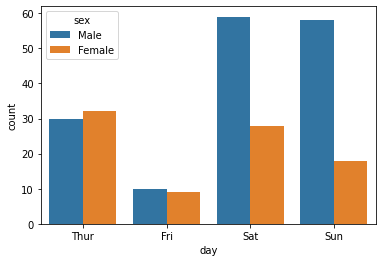

In [37]:
sns.countplot(x= restaurante.day, hue=restaurante.sex)
#Los días con más hombres que muejeres son viernes, sabado, domingo

**3. Do you think bill amounts change considerably depending on smoking?**

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

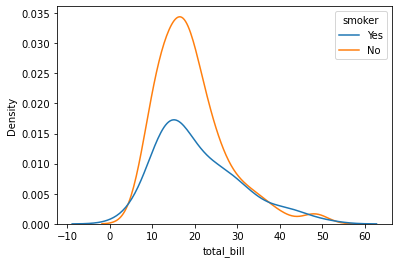

In [42]:
sns.kdeplot(x="total_bill", hue="smoker", data = restaurante)


**4. Is tip correlated to total_bill? Draw a scatter plot**

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

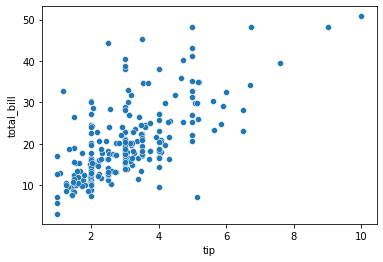

In [40]:
sns.scatterplot(x="tip", y="total_bill", data = restaurante)

**BONUS**: Draw a graph of your choice with 2 numerical variables and 2 categorical variable (HINT: use `hue` and `style`). Do you find it useful?

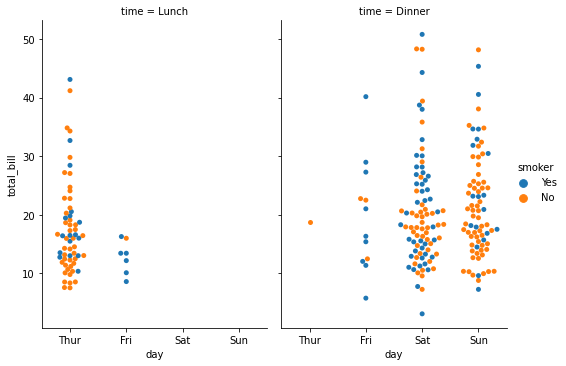

In [51]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.7,
            kind="swarm", data=restaurante)